# Data Cleaning

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Load Data

In [2]:
datapath = "./data/HYSETS_combined_data_additional_part_2.csv"
df = pd.read_csv(datapath, index_col = 0)
df

,watershed,time,watershedID,drainage_area,drainage_area_GSIM,flag_GSIM_boundaries,flag_artificial_boundaries,elevation,slope,discharge,...,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,Hydrometric_station_latitude,Hydrometric_station_longitude
0,0,1950-01-01,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
1,0,1950-01-02,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
2,0,1950-01-03,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
3,0,1950-01-04,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
4,0,1950-01-05,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308575,289,2018-12-27,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819
7308576,289,2018-12-28,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819
7308577,289,2018-12-29,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819
7308578,289,2018-12-30,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819


## Remove Watersheds with Constant Precipitation, Max Temp, or Min Temp, Missing Watershed Characteristics, or Completely Empty Discharge Values

In [3]:
drop_indexes_const_cov = []
drop_indexes_missing_watershed_data = []
drop_indexes_missing_discharge = []
for watershed in set(df["watershedID"]):
    watershed_df = df[df["watershedID"] == watershed]
    if len(set(watershed_df["pr"])) == 1 or len(set(watershed_df["tasmax"])) == 1 or len(set(watershed_df["tasmin"])) == 1:
        drop_indexes_const_cov += list(watershed_df.index)
    if np.isnan(watershed_df["Gravelius"]).all() or np.isnan(watershed_df["Perimeter"]).all() or np.isnan(watershed_df["Permeability_logk_m2"]).all() or np.isnan(watershed_df["Porosity_frac"]).all():
        drop_indexes_missing_watershed_data += list(watershed_df.index)
    if np.isnan(watershed_df["discharge"]).all():
        drop_indexes_missing_discharge += list(watershed_df.index)
        
print(len(drop_indexes_const_cov)/len(df)*100)
print(len(drop_indexes_missing_watershed_data)/len(df)*100)
print(len(drop_indexes_missing_discharge)/len(df)*100)

drop_indexes = list(set(drop_indexes_const_cov + drop_indexes_missing_watershed_data + drop_indexes_missing_discharge))
df.drop(index = drop_indexes, inplace = True)
df

0.0
9.310344827586208
0.0


,watershed,time,watershedID,drainage_area,drainage_area_GSIM,flag_GSIM_boundaries,flag_artificial_boundaries,elevation,slope,discharge,...,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,Hydrometric_station_latitude,Hydrometric_station_longitude
0,0,1950-01-01,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
1,0,1950-01-02,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
2,0,1950-01-03,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
3,0,1950-01-04,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
4,0,1950-01-05,855.0,38.426769,NaN,0.0,0.0,1267.310940,2.663227,NaN,...,0.0461,0.0217,0.8020,0.0,1,-15.200000,0.190000,1,49.49232,-113.9265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308575,289,2018-12-27,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819
7308576,289,2018-12-28,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819
7308577,289,2018-12-29,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819
7308578,289,2018-12-30,2371.0,118.000000,141.9198,1.0,0.0,863.181711,1.280368,NaN,...,0.0247,0.0020,0.5747,0.0,1,-16.222831,0.132237,1,49.26167,-107.6819


## Drop Variables That Should Not Affect the Result

In [4]:
df = df.drop(columns = ["Source", "Name", "watershed", "Official_ID", "drainage_area_GSIM", "Drainage_Area_GSIM_km2",
                        "flag_GSIM_boundaries", "flag_artificial_boundaries", "Centroid_Lat_deg_N", "Centroid_Lon_deg_E",
                        "Drainage_Area_km2", "Flag_GSIM_boundaries", "Flag_Artificial_Boundaries", "Elevation_m",
                        "Slope_deg", "Flag_Shape_Extraction", "Flag_Terrain_Extraction", "Flag_Land_Use_Extraction",
                        "Flag_Subsoil_Extraction"
                       ])

## Check Datatypes and Nulls

In [5]:
df.dtypes

time                              object
watershedID                      float64
drainage_area                    float64
elevation                        float64
slope                            float64
discharge                        float64
pr                               float64
tasmax                           float64
tasmin                           float64
centroid_lat                     float64
centroid_lon                     float64
Gravelius                        float64
Perimeter                        float64
Aspect_deg                       float64
Land_Use_Forest_frac             float64
Land_Use_Grass_frac              float64
Land_Use_Wetland_frac            float64
Land_Use_Water_frac              float64
Land_Use_Urban_frac              float64
Land_Use_Shrubs_frac             float64
Land_Use_Crops_frac              float64
Land_Use_Snow_Ice_frac           float64
Permeability_logk_m2             float64
Porosity_frac                    float64
Hydrometric_stat

In [6]:
print("number of data points:", len(df))
print("number of watersheds:", len(set(df["watershedID"])))
print("percentage null discharge values:", df.isnull().sum()["discharge"]/len(df)*100)
df.isnull().sum()

number of data points: 6628126
number of watersheds: 263
percentage null discharge values: 63.23594331188032


time                                   0
watershedID                            0
drainage_area                          0
elevation                              0
slope                                  0
discharge                        4191358
pr                                    40
tasmax                                37
tasmin                                15
centroid_lat                           0
centroid_lon                           0
Gravelius                              0
Perimeter                              0
Aspect_deg                             0
Land_Use_Forest_frac                   0
Land_Use_Grass_frac                    0
Land_Use_Wetland_frac                  0
Land_Use_Water_frac                    0
Land_Use_Urban_frac                    0
Land_Use_Shrubs_frac                   0
Land_Use_Crops_frac                    0
Land_Use_Snow_Ice_frac                 0
Permeability_logk_m2                   0
Porosity_frac                          0
Hydrometric_stat

## Which Time Ranges with Missing Data Can We Cut off at the Beginning or End?

In [7]:
year_min = datetime.datetime.strptime(min(df["time"]),'%Y-%m-%d').year
year_max = datetime.datetime.strptime(max(df["time"]),'%Y-%m-%d').year

time_range = range(year_min, year_max + 1)
percent_null_discharge_df = pd.DataFrame(index = time_range,
                                      columns = ["percent_null_up_to_year", "percent_null_down_to_year"])
for time in time_range:
    partial_df = df[df["time"] > str(time)]
    percent_null_discharge_df.loc[time, "percent_null_cut_earlier_years"] = partial_df.isnull().sum()["discharge"]/len(partial_df)
    
for time in reversed(time_range):
    partial_df = df[df["time"] <= str(time)]
    percent_null_discharge_df.loc[time, "percent_null_cut_later_years"] = partial_df.isnull().sum()["discharge"]/len(partial_df)
    
percent_null_discharge_df

C:\Users\yannusinovich\AppData\Local\Temp\ipykernel_23492\1516806414.py:13: RuntimeWarning: invalid value encountered in double_scalars
  percent_null_discharge_df.loc[time, "percent_null_cut_later_years"] = partial_df.isnull().sum()["discharge"]/len(partial_df)


,percent_null_up_to_year,percent_null_down_to_year,percent_null_cut_earlier_years,percent_null_cut_later_years
1950,NaN,NaN,0.632359,NaN
1951,NaN,NaN,0.627748,0.946143
1952,NaN,NaN,0.623087,0.943205
1953,NaN,NaN,0.618156,0.944763
1954,NaN,NaN,0.613110,0.945157
...,...,...,...,...
2014,NaN,NaN,0.545767,0.639124
2015,NaN,NaN,0.557944,0.636939
2016,NaN,NaN,0.568500,0.635263
2017,NaN,NaN,0.578067,0.633979


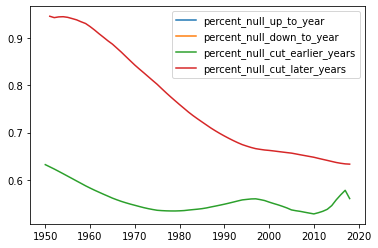

In [8]:
percent_null_discharge_df.plot();

In [9]:
df = df[(df["time"] > str(1978)) & (df["time"] <= str(2010))]

In [10]:
print("number of data points:", len(df))
print("number of watersheds:", len(set(df["watershedID"])))
print("percentage null discharge values:", df.isnull().sum()["discharge"]/len(df)*100)
df.isnull().sum()

number of data points: 3073944
number of watersheds: 263
percentage null discharge values: 53.620885741574995


time                                   0
watershedID                            0
drainage_area                          0
elevation                              0
slope                                  0
discharge                        1648276
pr                                     2
tasmax                                 1
tasmin                                 0
centroid_lat                           0
centroid_lon                           0
Gravelius                              0
Perimeter                              0
Aspect_deg                             0
Land_Use_Forest_frac                   0
Land_Use_Grass_frac                    0
Land_Use_Wetland_frac                  0
Land_Use_Water_frac                    0
Land_Use_Urban_frac                    0
Land_Use_Shrubs_frac                   0
Land_Use_Crops_frac                    0
Land_Use_Snow_Ice_frac                 0
Permeability_logk_m2                   0
Porosity_frac                          0
Hydrometric_stat

## What Is the Relationship Between Dropping Watersheds With Too Many Nulls, vs. Retaining Enough Watersheds for a Useful Model?

In [11]:
avg_null = df.isnull().sum()["discharge"]/len(df)*100

watershed_dropping_df = pd.DataFrame(index = map(lambda x: x/100.0, range(5, 205, 5)),
                                     columns = ["percent_of_data_dropped", "percent_nulls_left_after_drop"])

for drop_ratio in map(lambda x: x/100.0, range(5, 205, 5)): # [0.05, 0.1, ..., 1.95, 2]
    drop_indexes_mostly_null_discharge = []
    for watershed in set(df["watershedID"]):
        watershed_df = df[df["watershedID"] == watershed]
        if sum(np.isnan(watershed_df["discharge"]))/len(watershed_df)*100 > drop_ratio*avg_null:
            drop_indexes_mostly_null_discharge += list(watershed_df.index)
    dropped_df = df.drop(index = drop_indexes_mostly_null_discharge)
    watershed_dropping_df.loc[drop_ratio, "percent_of_data_dropped"] = len(drop_indexes_mostly_null_discharge)/len(df)*100
    watershed_dropping_df.loc[drop_ratio, "percent_nulls_left_after_drop"] = dropped_df.isnull().sum()["discharge"]/len(dropped_df)*100
    watershed_dropping_df.loc[drop_ratio, "percent_watersheds_left_after_drop"] = len(set(dropped_df["watershedID"]))/len(set(df["watershedID"]))*100

In [12]:
watershed_dropping_df

,percent_of_data_dropped,percent_nulls_left_after_drop,percent_watersheds_left_after_drop
0.05,95.057034,0.443584,4.942966
0.10,95.057034,0.443584,4.942966
0.15,95.057034,0.443584,4.942966
0.20,94.676806,0.99186,5.323194
0.25,94.676806,0.99186,5.323194
0.30,93.155894,3.957525,6.844106
0.35,92.775665,4.620123,7.224335
0.40,92.775665,4.620123,7.224335
0.45,92.775665,4.620123,7.224335
0.50,91.254753,8.199789,8.745247


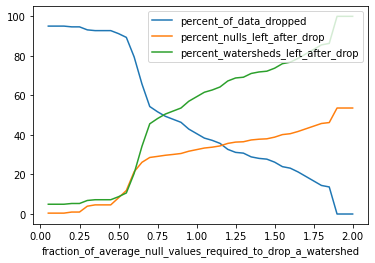

In [13]:
watershed_dropping_df.plot(xlabel = "fraction_of_average_null_values_required_to_drop_a_watershed");

In [14]:
drop_indexes_mostly_null_discharge = []
for watershed in set(df["watershedID"]):
    watershed_df = df[df["watershedID"] == watershed]
    if sum(np.isnan(watershed_df["discharge"]))/len(watershed_df)*100 > 0.8*avg_null:
        drop_indexes_mostly_null_discharge += list(watershed_df.index)
df.drop(index = drop_indexes_mostly_null_discharge, inplace = True)
df

,time,watershedID,drainage_area,elevation,slope,discharge,pr,tasmax,tasmin,centroid_lat,...,Land_Use_Wetland_frac,Land_Use_Water_frac,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Permeability_logk_m2,Porosity_frac,Hydrometric_station_latitude,Hydrometric_station_longitude
35429,1978-01-01,859.0,440.833477,1367.754077,8.435179,NaN,0.000000,-5.432079,-27.493258,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
35430,1978-01-02,859.0,440.833477,1367.754077,8.435179,NaN,0.000000,-3.328034,-23.670760,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
35431,1978-01-03,859.0,440.833477,1367.754077,8.435179,NaN,10.101207,-12.074663,-22.485310,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
35432,1978-01-04,859.0,440.833477,1367.754077,8.435179,NaN,6.966643,-17.925337,-19.597303,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
35433,1978-01-05,859.0,440.833477,1367.754077,8.435179,NaN,0.051100,-11.183038,-21.545280,49.97735,...,0.0106,0.0001,0.0144,0.0852,0.0447,0.0,-15.200000,0.19000,49.97735,-113.6860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280086,2009-12-27,2370.0,497.006132,888.509557,1.735527,NaN,0.000000,-15.509319,-31.992678,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
7280087,2009-12-28,2370.0,497.006132,888.509557,1.735527,NaN,0.000000,-13.991346,-27.980030,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
7280088,2009-12-29,2370.0,497.006132,888.509557,1.735527,NaN,0.000000,-13.986687,-26.996006,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037
7280089,2009-12-30,2370.0,497.006132,888.509557,1.735527,NaN,0.000000,-14.002663,-28.007322,49.30725,...,0.0086,0.0016,0.0126,0.0038,0.2816,0.0,-15.678715,0.15407,49.30725,-107.7037


In [15]:
print("number of data points:", len(df))
print("number of watersheds:", len(set(df["watershedID"])))
print("percentage null discharge values:", df.isnull().sum()["discharge"]/len(df)*100)
df.isnull().sum()

number of data points: 1554504
number of watersheds: 133
percentage null discharge values: 29.71912584335582


time                                  0
watershedID                           0
drainage_area                         0
elevation                             0
slope                                 0
discharge                        461985
pr                                    2
tasmax                                1
tasmin                                0
centroid_lat                          0
centroid_lon                          0
Gravelius                             0
Perimeter                             0
Aspect_deg                            0
Land_Use_Forest_frac                  0
Land_Use_Grass_frac                   0
Land_Use_Wetland_frac                 0
Land_Use_Water_frac                   0
Land_Use_Urban_frac                   0
Land_Use_Shrubs_frac                  0
Land_Use_Crops_frac                   0
Land_Use_Snow_Ice_frac                0
Permeability_logk_m2                  0
Porosity_frac                         0
Hydrometric_station_latitude          0


## Interpolate Remaining Null Values

In [16]:
df["time"] = pd.to_datetime(df["time"])
df.set_index('time', inplace = True)
for watershedID in set(df["watershedID"]):
    df[df["watershedID"] == watershedID] = df[df["watershedID"] == watershedID].interpolate(method='time', axis=0, limit_direction="both")

df.dropna(inplace = True)

In [17]:
print("number of data points:", len(df))
print("number of watersheds:", len(set(df["watershedID"])))
print("percentage null discharge values:", df.isnull().sum()["discharge"]/len(df)*100)
df.isnull().sum()

number of data points: 1554504
number of watersheds: 133
percentage null discharge values: 0.0


watershedID                      0
drainage_area                    0
elevation                        0
slope                            0
discharge                        0
pr                               0
tasmax                           0
tasmin                           0
centroid_lat                     0
centroid_lon                     0
Gravelius                        0
Perimeter                        0
Aspect_deg                       0
Land_Use_Forest_frac             0
Land_Use_Grass_frac              0
Land_Use_Wetland_frac            0
Land_Use_Water_frac              0
Land_Use_Urban_frac              0
Land_Use_Shrubs_frac             0
Land_Use_Crops_frac              0
Land_Use_Snow_Ice_frac           0
Permeability_logk_m2             0
Porosity_frac                    0
Hydrometric_station_latitude     0
Hydrometric_station_longitude    0
dtype: int64

## Save

In [18]:
df.to_csv("./data/HYSETS_combined_and_cleaned_data.csv")